# ML Tutorial Day 20

## Ensemble Learning: Bagging

If we have a single dataset and we train our model on that dataset, then there is a high chance that the model will learn the data,i.e., the model overfits the data and thus, has high variance.

To tackle the problem of high variance, we can use ensemble techniques. In ensemble learning, we train multiple models and when we make predictions, we somehow combine the result given by all the models, to get the optimal response.


Suppose we have a set of 100 samples and we want to train a machine learning model on this dataset such that it doesn't overfits the data (high variance).

We can create various smaller subset of 70 samples where each sample is taken randomly from the main dataset with resampling and replacement (we can get the same sample multiple times).

Then we train different instances of the same machine learning model on individual datasets. We perform the prediction on all three models and then we combine the output (something like majority vote for a logistic regression problem) from all the models to get our optimized result.

The benefit of doing this is that every individual model is a weak learner, which means, they are trained on a subset of the actual dataset and thus, they will not overfit the data and geenralize the underlying pattern better. When we combine the result from multiple weak learners, we get an overall quality result.

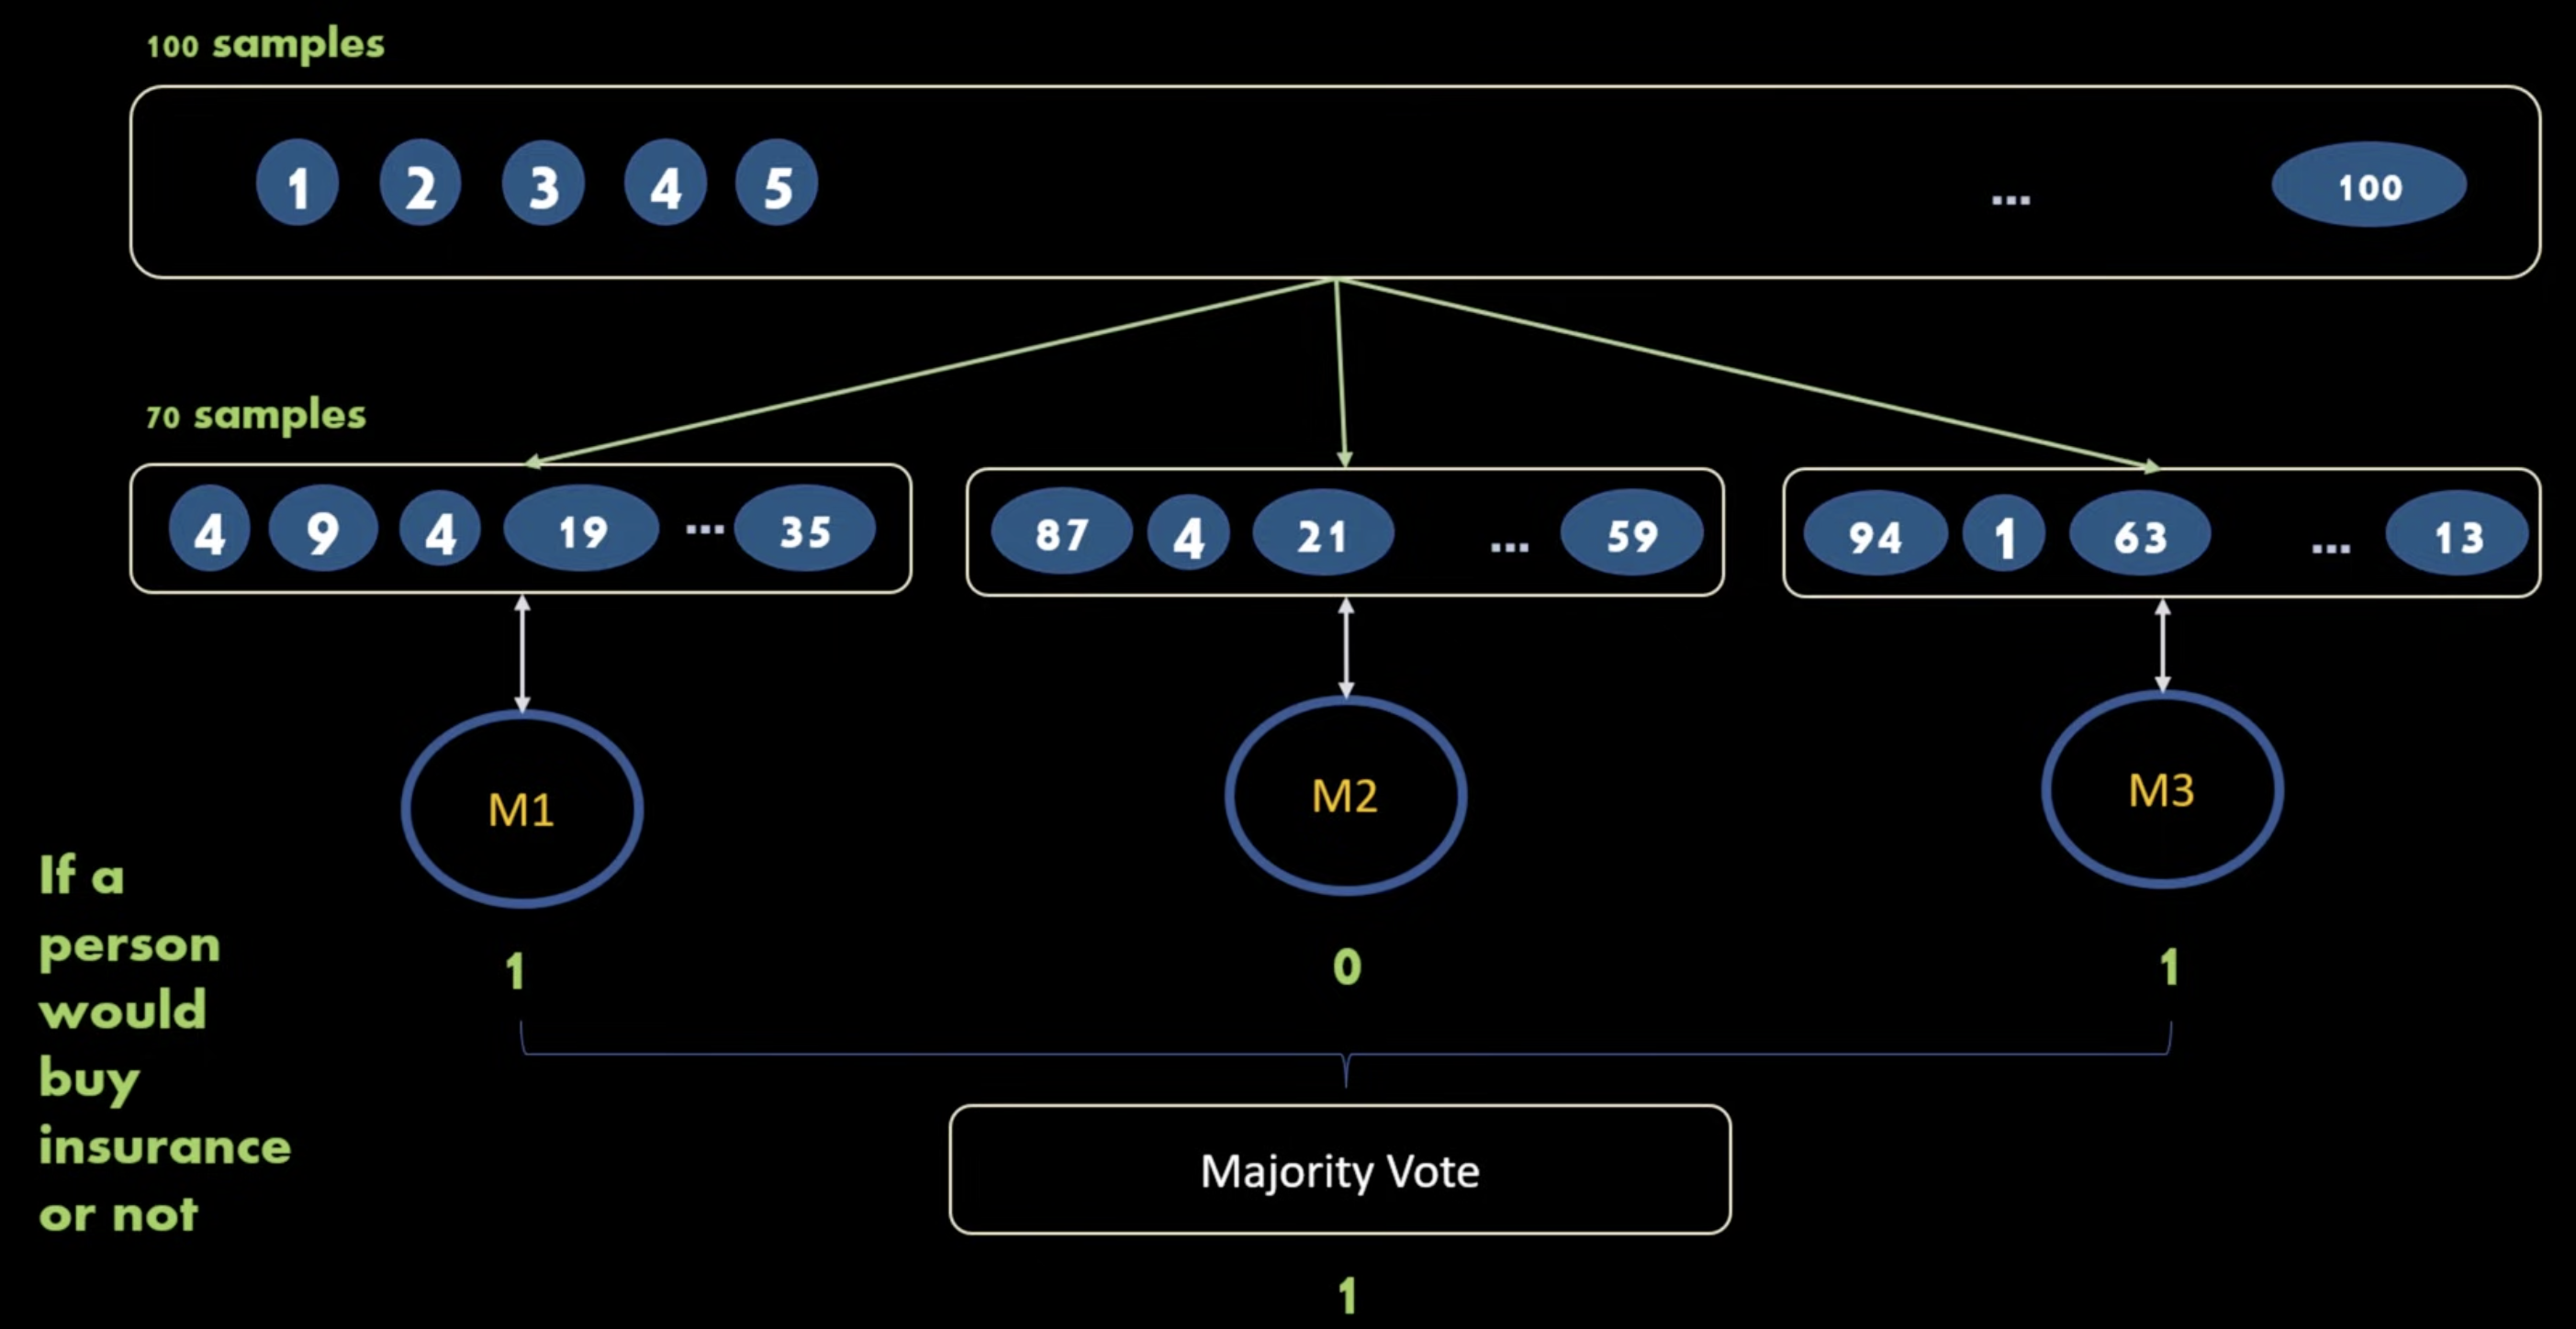

This technique is also called bootstrap aggregation because:
Bootstrap: creating mutiple datasets with resampling and replacement from a larger dataset
Aggregation: combining the result from all the models

Random forest is one of the bagging techniques with one distinction. Here, we sample both the data rows (datapoints) and columns (features). 

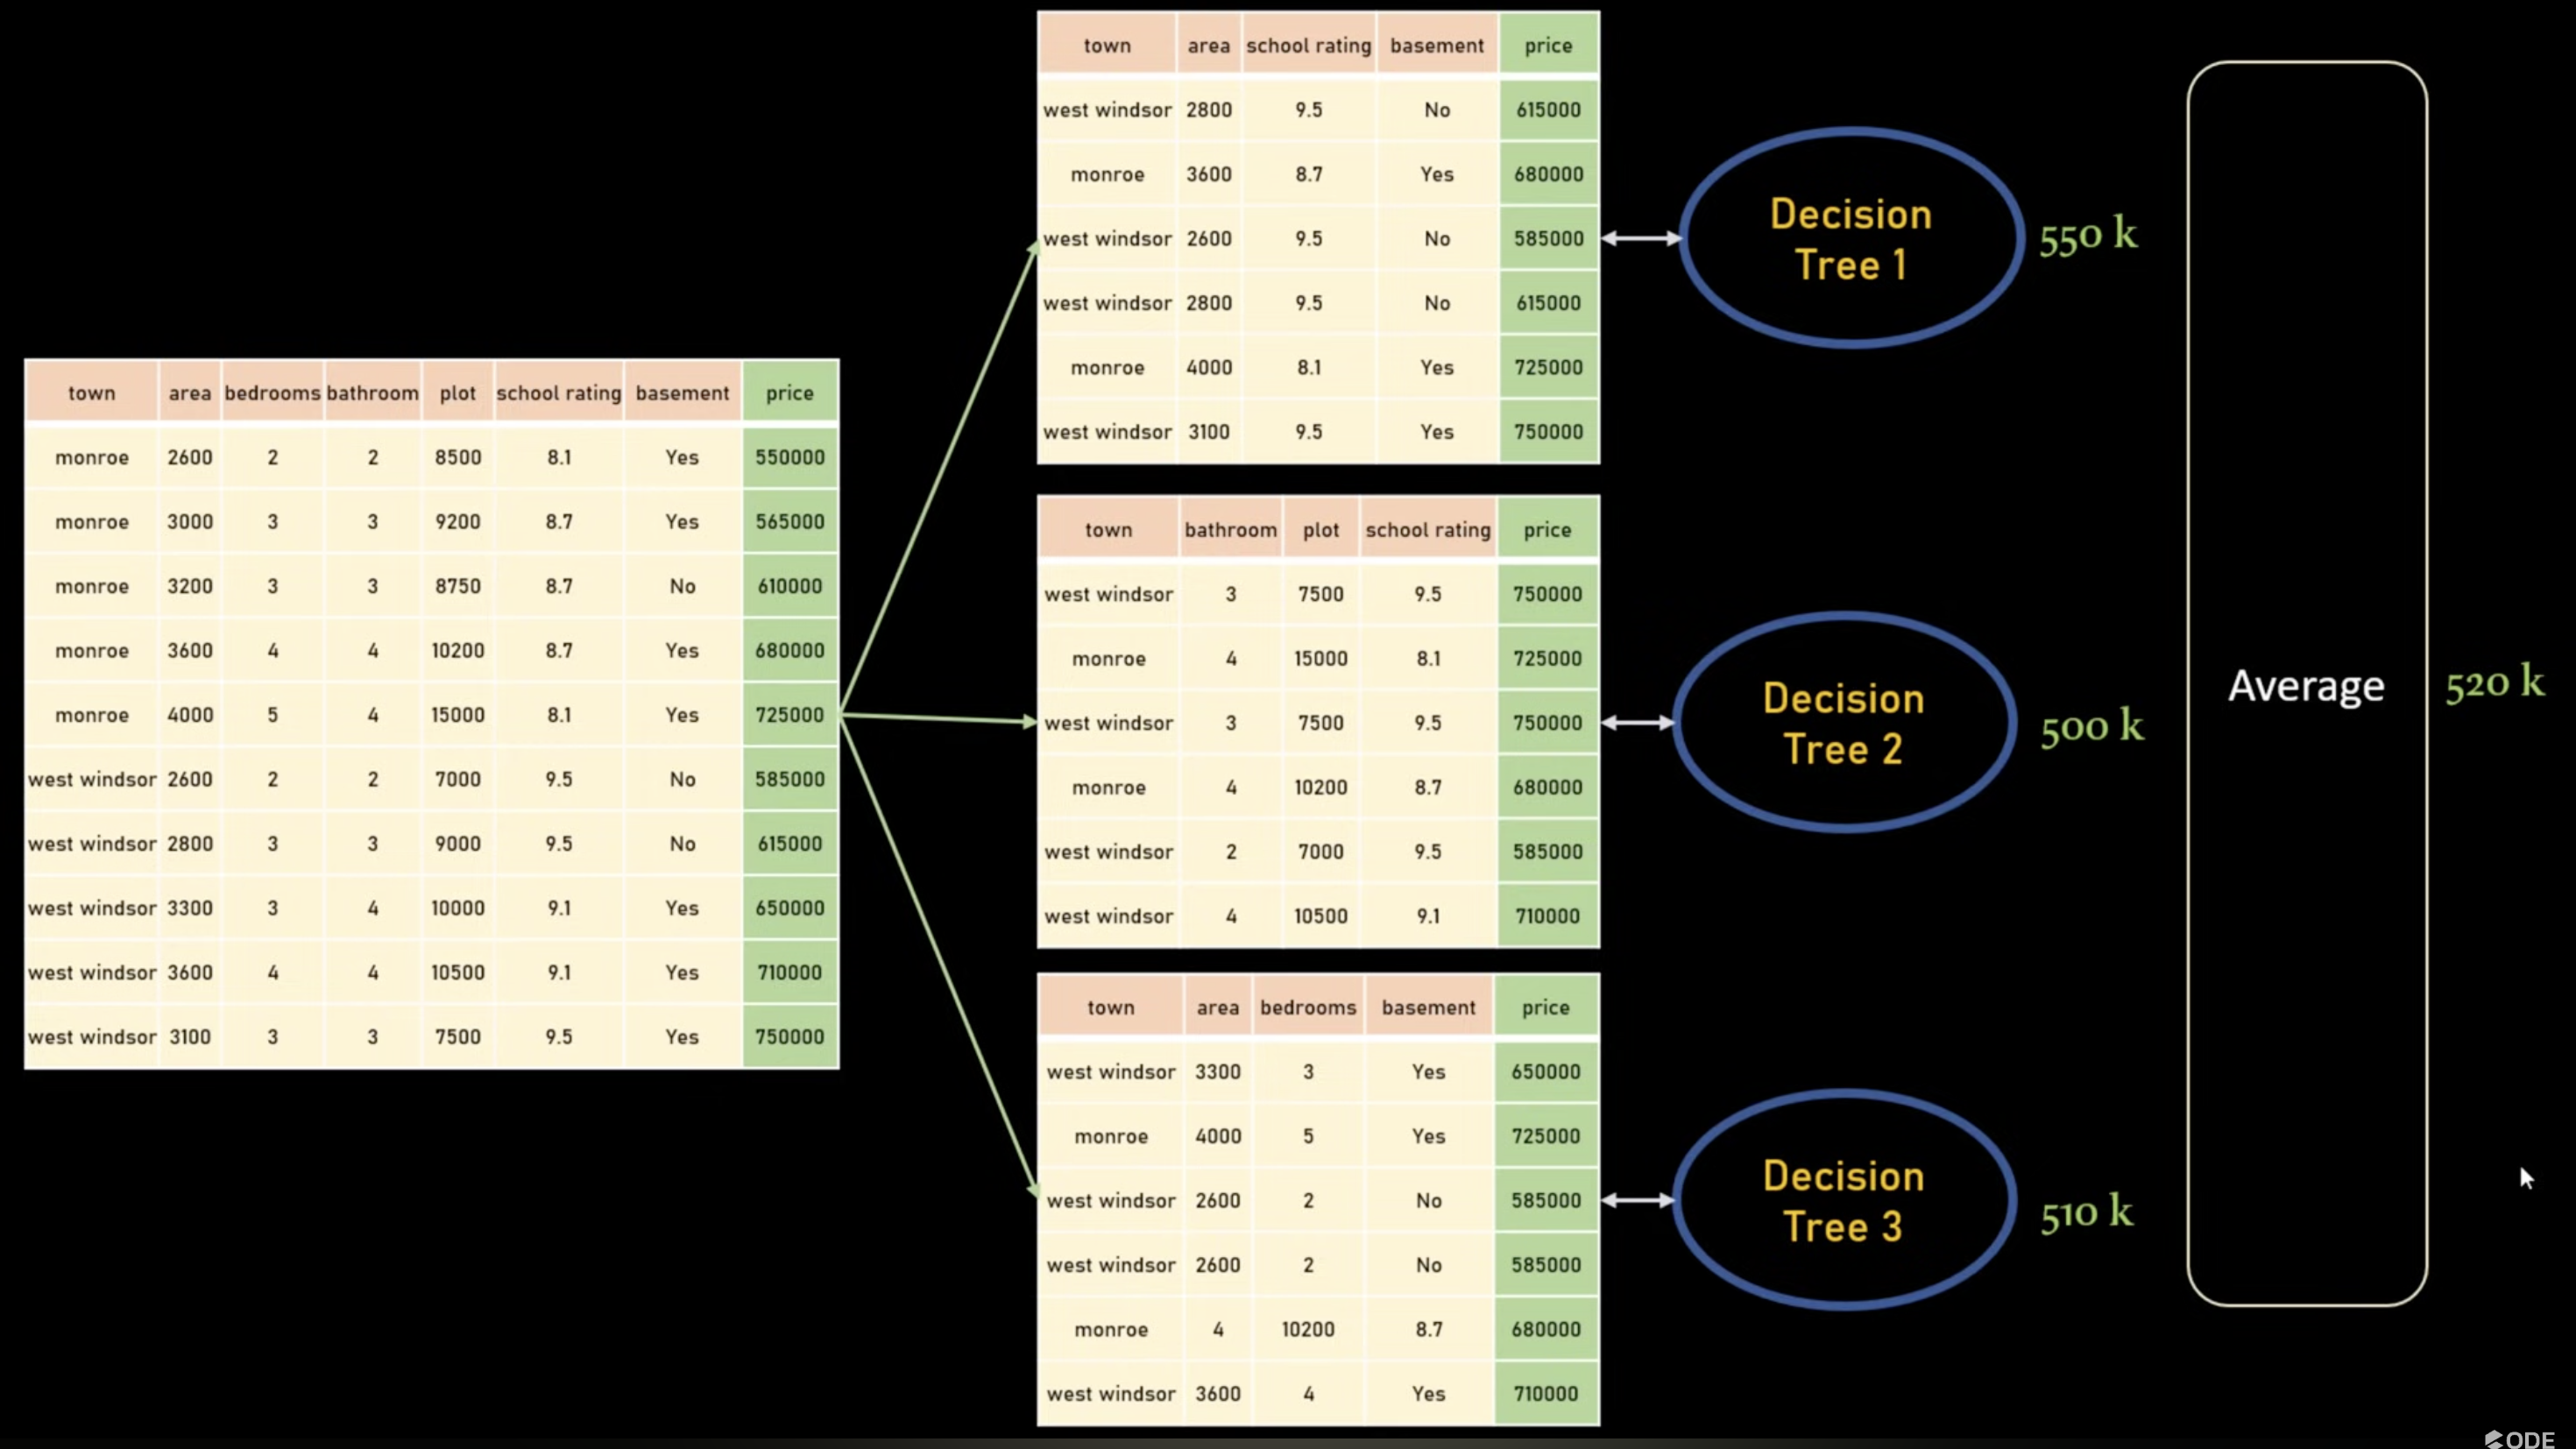

Bagging: Underlying model can be anything (SVM, KNN, Logistic Regression, etc.)

Bagged Tree: Each model is a tree

In [40]:
# loading the data
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Understanding the dataset

In [41]:
# checking if a feature has null values
df.isnull().sum()

# we don't have any null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
# basic statics of the dataset
df.describe()

# no outliers seen in the dataset 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [43]:
# we'll look for class imbalance which means that most of the samples belong to a particular class
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [44]:
# shows that the dataset is very slightly imbalanced
df.Outcome.value_counts()[1]/df.Outcome.value_counts()[0]

np.float64(0.536)

### Preparing the feature and target set

In [45]:
# preparing the datasets
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [46]:
# scaling the features as they belong to vastly different scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# preparing the training and testing datasets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size = 0.2, stratify = y, random_state = 10)

y_train

332    1
111    1
64     1
742    0
101    0
      ..
735    0
475    0
46     0
767    0
709    1
Name: Outcome, Length: 614, dtype: int64

### Training a model

In [48]:
# using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTreeClassifier(), X_scaled, y, cv=5)
score

array([0.67532468, 0.67532468, 0.68181818, 0.78431373, 0.7254902 ])

In [49]:
# mean score of the model
score.mean() 

np.float64(0.708454290807232)

In [50]:
# using bagging classifier
from sklearn.ensemble import BaggingClassifier

# oob score is basically the performance of the model on the data it has not seen.
# it might happen that during bootstrap process, we might miss some samples from
# the main dataset. We can use those samples to test our model.
bc = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)
bc.fit(X_train, y_train)
bc.oob_score_


0.758957654723127

In [51]:
# using cross validation and bagging classifier
bc = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)
scores = cross_val_score(bc, X, y, cv = 5)
scores.mean()

# bagging is really useful when the dataset has high variance

np.float64(0.7578728461081402)

In [52]:
# using random forest
from sklearn.ensemble import RandomForestClassifier
score = cross_val_score(RandomForestClassifier(), X, y, cv = 5)
score.mean()

np.float64(0.7604787369493252)